## P6.2.1
-----

In [37]:
import numpy as np
from datetime import datetime, timedelta
from tabulate import tabulate

EPOCH = datetime(1970, 1, 1)

datatype = np.dtype(
    [
        ("name", "S20"),
        ("height", int),
        ("first_ascension", "S10"),
        ("first_winter_ascencion", "S10"),
        ("latitude", "S20"),
        ("longitude", "S20"),
    ]
)


def convert_to_datetime(date_string: str) -> float:
    """
    Convert a string of the form DD/MM/YYYY into the number of seconds since the epoch.
    """
    return datetime.strptime(date_string.decode("utf-8"), "%d/%m/%Y")


def angle_str_to_float(angle: str) -> float:
    """
    Convert an angle given in degrees, D, minutes, M, and seconds, S as a
    string 'DdMdSs' in to a float representing decimal degrees.
    """
    degrees, remainder = angle.split("d")
    minutes, remainder = remainder.split("m")
    seconds, remainder = remainder.split("s")
    return float(degrees) + float(minutes) / 60 + float(seconds) / 3600


def convert_longlat_to_float(longlat: str) -> float:
    """
    Convert a string representing the coordinates to a float.
    """
    longlat = longlat.decode("utf-8")
    sgn = {"N": 1, "E": 1, "S": -1, "W": -1}
    return sgn[longlat[-1]] * angle_str_to_float(longlat[:-1])


mountain_peaks = np.genfromtxt(
    "C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/ex6-2-b-mountain-data.txt",
    dtype=datatype,
    skip_header=11,
        converters={
        2: convert_to_datetime,
        3: convert_to_datetime,
        4: convert_longlat_to_float,
        5: convert_longlat_to_float,

    },

    delimiter=(13, 5, 14, 12, 13, 11),
    skip_footer=1,
    autostrip=True,
)

print(tabulate(mountain_peaks, headers="keys") + "\n")

shortest_mountain = np.argmin(mountain_peaks["height"])
print(f"The tallest mountain is {mountain_peaks[shortest_mountain]['name'].decode('utf-8')}")

most_northerly_peak = np.argmax(mountain_peaks["latitude"])
print(f"The most northerly peak is {mountain_peaks[most_northerly_peak]['name'].decode('utf-8')}")

most_southerly_peak = np.argmin(mountain_peaks["latitude"])
print(f"The most southerly peak is {mountain_peaks[most_southerly_peak]['name'].decode('utf-8')}")

most_easterly_peak = np.argmax(mountain_peaks["longitude"])
print(f"The most easterly peak is {mountain_peaks[most_easterly_peak]['name'].decode('utf-8')}")

most_westerly_peak = np.argmin(mountain_peaks["longitude"])
print(f"The most westerly peak is {mountain_peaks[most_westerly_peak]['name'].decode('utf-8')}")


most_recent_first_ascent = np.argmax(mountain_peaks["first_ascension"])
print(f"The most recent first ascent is {mountain_peaks[most_recent_first_ascent]['name'].decode('utf-8')}")

most_recent_first_winter_ascent = np.argmax(mountain_peaks["first_winter_ascencion"])
print(f"The most recent first winter ascent is {mountain_peaks[most_recent_first_winter_ascent]['name'].decode('utf-8')}")


name             height  first_ascension    first_winter_ascencion      latitude    longitude
-------------  --------  -----------------  ------------------------  ----------  -----------
Annapurna I        8091  1950-06-03         1987-02-03                   28.5961      83.8203
Broad Peak         8051  1957-06-09         2013-03-05                   35.8108      76.5683
Cho Oyu            8201  1954-10-19         1985-02-12                   28.0942      86.6608
Dhaulagiri I       8167  1960-05-13         1985-01-21                   27.9881      86.9253
Everest            8848  1953-05-29         1980-02-17                   27.9881      86.9253
Gasherbrum I       8080  1958-07-05         2012-03-09                   35.7244      76.6964
Gasherbrum II      8034  1956-07-07         2011-02-02                   35.7583      76.6533
K2                 8611  1954-07-31         ???                          35.8825      76.5133
Kangchenjunga      8568  1955-05-25         1986-01-11      

## P6.2.2
-----

In [64]:
import numpy as np
from math import radians, cos, sin, asin, sqrt
from tabulate import tabulate

datatype = np.dtype(
    [
        ("IATA_code", "S3"),
        ("name", "S50"),
        ("location", "S50"),
        ("latitude", float),
        ("longitude", float),
    ]
)


def calculate_distance_between_coordinates(
    lat1: float, lon1: float, lat2: float, lon2: float
) -> float:
    """
    Calculate the distance between two coordinates in kilometres.
    """
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    km = 6378.1 * c
    return km


airport_table = np.genfromtxt(
    "C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/busiest_airports.txt",
    dtype=datatype,
    delimiter="\t",
    autostrip=True,
)
# print(tabulate(airport_table, headers="keys"))

airport_1 = bytes(input("Enter the IATA code of the first airport: "), encoding="ascii")
airport_2 = bytes(
    input("Enter the IATA code of the second airport: "), encoding="ascii"
)

airport_1 = airport_table[airport_table["IATA_code"] == airport_1]
airport_2 = airport_table[airport_table["IATA_code"] == airport_2]


distance = calculate_distance_between_coordinates(
    airport_1["latitude"][0],
    airport_1["longitude"][0],
    airport_2["latitude"][0],
    airport_2["longitude"][0],
)
print(f"The distance is {distance:.2f} km.")


The distance is 8625.13 km.


## P6.2.3
-----

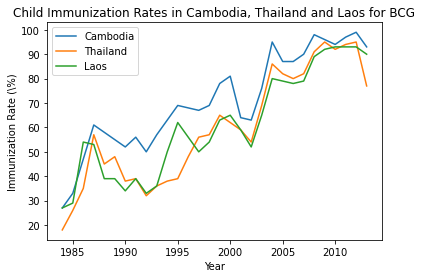

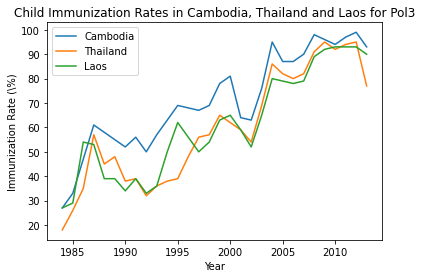

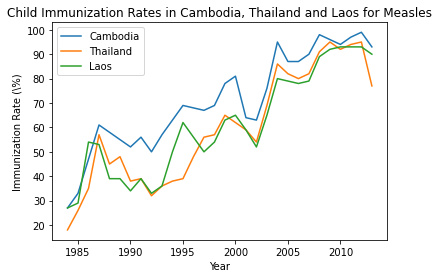

In [80]:
import numpy as np
import matplotlib.pyplot as plt


immunization_table = np.genfromtxt(
    "C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/wb-data.dat",
    delimiter=";",
    skip_header=1,
    missing_values="..",
)


def plot_data(data: np.ndarray, vaccine_name: str) -> None:
    """
    Plot the data for a country.
    """
    years = np.linspace(1960, 2013, num=54, dtype=int)

    plt.title(
        f"Child Immunization Rates in Cambodia, Thailand and Laos for {vaccine_name}"
    )
    plt.xlabel("Year")
    plt.ylabel("Immunization Rate (\%)")
    plt.plot(years, immunization_table[0, 4:], label="Cambodia")
    plt.plot(years, immunization_table[1, 4:], label="Thailand")
    plt.plot(years, immunization_table[2, 4:], label="Laos")
    plt.legend()
    plt.show()


plot_data(immunization_table[::3], "BCG")
plot_data(immunization_table[1::3], "Pol3")
plot_data(immunization_table[2::3], "Measles")
